# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [4]:
!pip install scipy==1.7.3

In [1]:
!pip install scikit-plot

INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: contourpy
    Found existing installation: contourpy 1.3.1
    Uninstalling contourpy-1.3.1:
      Successfully uninstalled contourpy-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.1 requires numpy>=1.23.5, but you have numpy 1.22.4 which is incompatible.
plotnine 0.14.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.


In [2]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
!gdown --id 1ZoFNM1bUJAWOa10MBmC2JyniSuvKY-tX -O car_data.csv

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZoFNM1bUJAWOa10MBmC2JyniSuvKY-tX
To: /content/car_data.csv
100% 58.4k/58.4k [00:00<00:00, 53.4MB/s]


In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [6]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,256,91,36,77,157,56,7,155,42,19,126,177,361,123,65,8,15,195,201
1,651,85,40,66,136,58,6,142,48,19,137,164,295,164,77,2,22,182,186
2,737,105,51,93,160,51,7,217,30,24,165,240,703,208,81,9,25,188,188
3,824,106,55,96,196,60,12,221,30,25,173,225,717,214,72,9,13,186,196
4,192,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
5,273,96,45,80,162,63,9,146,46,19,148,161,316,161,64,5,10,199,207
6,727,96,44,68,190,70,7,155,41,19,145,179,372,166,67,5,7,202,206
7,452,92,38,74,178,62,9,161,41,20,135,181,388,132,63,7,29,197,206
8,285,89,48,85,189,64,8,169,39,20,153,188,427,190,64,16,5,195,201
9,91,94,38,84,158,55,9,169,39,20,130,196,430,155,69,9,15,190,195


Methods `describe` and `info` deliver some useful information.

In [7]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,410.040073,93.976321,45.032787,82.730419,169.555556,61.504554,8.417122,169.969035,40.615665,20.663024,148.400729,189.497268,445.428051,175.495446,72.224044,6.703097,12.726776,189.038251,195.812386
std,244.486409,8.279856,6.185014,15.759142,32.152850,6.420093,3.522990,33.056148,7.656626,2.579629,14.477382,30.531880,176.199126,32.716467,6.821692,5.018325,9.124545,6.077390,7.437535
min,0.000000,76.000000,33.000000,40.000000,109.000000,48.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,202.000000,88.000000,40.000000,70.000000,144.000000,57.000000,7.000000,147.000000,33.000000,19.000000,138.000000,168.000000,320.000000,150.000000,67.000000,3.000000,5.000000,185.000000,191.000000
50%,398.000000,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,174.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,624.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,201.000000,46.000000,23.000000,160.000000,217.000000,605.000000,199.000000,75.000000,10.000000,20.000000,193.000000,201.000000
max,843.000000,119.000000,59.000000,112.000000,306.000000,126.000000,55.000000,262.000000,61.000000,28.000000,188.000000,288.000000,998.000000,268.000000,118.000000,22.000000,40.000000,206.000000,211.000000


In [8]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [9]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Масштабируем обучающие данные
scaled_train_data = scaler.fit_transform(X_train)

# Масштабируем тестовые данные, используя параметры, полученные на обучающих данных
scaled_test_data = scaler.fit_transform(X_test)

scaled_train_data.shape

(549, 19)

In [10]:
pd.DataFrame(scaled_train_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02,5.490000e+02
mean,-6.794808e-17,-5.662340e-17,-5.112284e-16,3.219445e-16,3.866569e-16,2.653211e-16,1.941374e-17,-1.811949e-16,-1.706791e-16,-1.569277e-16,7.312507e-16,-1.375140e-16,1.197180e-16,3.834213e-16,8.315550e-16,4.529872e-17,9.059743e-17,-3.850391e-16,1.093640e-15
std,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00,1.000912e+00
min,-1.678678e+00,-2.173071e+00,-1.947249e+00,-2.713941e+00,-1.885083e+00,-2.105401e+00,-1.823160e+00,-1.755253e+00,-1.910632e+00,-1.421276e+00,-2.032656e+00,-1.950470e+00,-1.485061e+00,-1.942549e+00,-1.940296e+00,-1.336942e+00,-1.396057e+00,-2.147327e+00,-1.993388e+00
25%,-8.517030e-01,-7.224487e-01,-8.144487e-01,-8.085484e-01,-7.955395e-01,-7.022737e-01,-4.026167e-01,-6.954828e-01,-9.955574e-01,-6.452634e-01,-7.190674e-01,-7.047346e-01,-7.125032e-01,-7.799955e-01,-7.664972e-01,-7.385878e-01,-8.475844e-01,-6.650773e-01,-6.476306e-01
50%,-4.929130e-02,-1.180227e-01,-1.671344e-01,-1.734174e-01,-4.842414e-02,-7.866146e-02,-1.185080e-01,-3.926913e-01,3.116921e-01,-2.572572e-01,-1.659774e-01,-3.441269e-01,-4.511968e-01,-4.575097e-02,-3.287279e-02,-1.402336e-01,-1.894177e-01,-6.299785e-03,1.598240e-01
75%,8.759385e-01,7.281737e-01,8.038370e-01,9.698185e-01,8.543402e-01,5.449507e-01,4.497094e-01,9.395912e-01,7.038669e-01,9.067611e-01,8.019302e-01,9.016089e-01,9.064601e-01,7.190871e-01,4.073019e-01,6.575720e-01,7.978323e-01,6.524778e-01,6.981271e-01
max,1.772511e+00,3.024992e+00,2.260294e+00,1.859002e+00,4.247489e+00,1.005504e+01,1.323460e+01,2.786619e+00,2.664741e+00,2.846792e+00,2.737745e+00,3.229168e+00,3.138925e+00,2.830040e+00,6.716472e+00,3.050989e+00,2.991721e+00,2.793505e+00,2.043885e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [11]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Создаем объект модели логистической регрессии
log_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Определяем сетку параметров для поиска по сетке
param_grid = {
    'penalty' : ['l1', 'l2'], # Тип регуляризации
    'C' : np.logspace(0, 4, 10) # Широкий диапазон значений для гиперпараметра регуляризации
}

# Инициализируем GridSearchCV с перекрестной проверкой на 5 фолдах и параллельной обработкой
clf = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Подбираем лучшие параметры и обучаем модель на тренировочных данных
best_model = clf.fit(scaled_train_data, y_train)

# Извлекаем лучший классификатор
best_estimator = best_model.best_estimator_

# Выводим лучшие параметры для удобства анализа
print("Best parameters found:", best_model.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters found: {'C': 2.7825594022071245, 'penalty': 'l1'}


In [12]:
from sklearn.metrics import accuracy_score, f1_score

# Предсказания на тренировочных данных
y_pred = best_estimator.predict(scaled_train_data)

# Расчет метрик
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred, average='weighted')

# Вывод метрик с улучшенным форматированием
print(f'Accuracy Score: {accuracy:.4f}, F1 Score (weighted): {f1:.4f}')

Accuracy Score: 0.8324, F1 Score (weighted): 0.8307


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

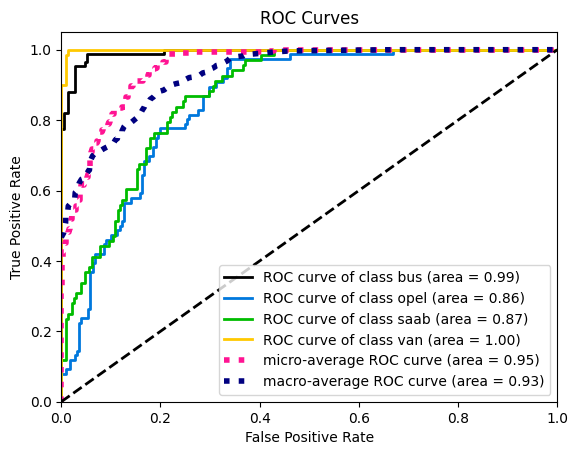

In [13]:
#plot roc
import scikitplot
predicted_proba = best_estimator.predict_proba(scaled_test_data)
scikitplot.metrics.plot_roc(y_test, predicted_proba)

In [ ]:
# You might use this command to install scikit-plot.
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot.

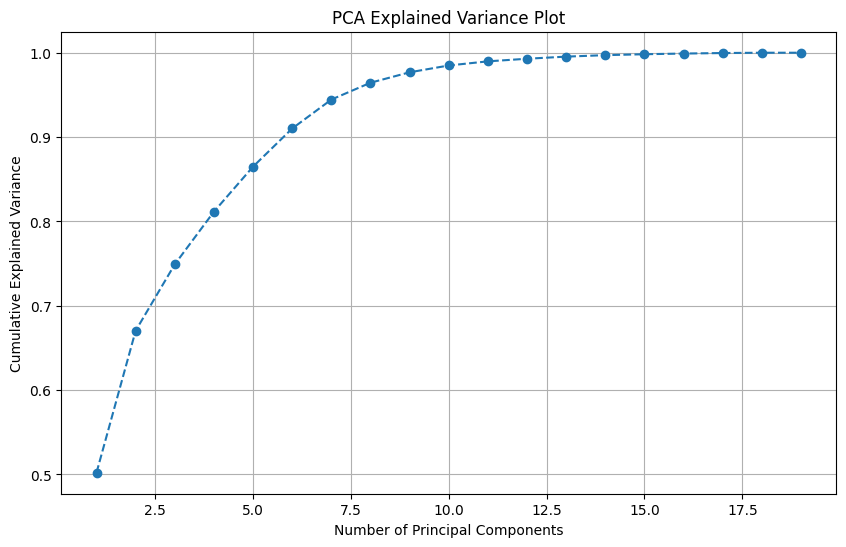

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Инициализируйте PCA и сопоставление с масштабированными обучающими данными
pca = PCA()
pca.fit(scaled_train_data)

# Рассчет коэффициентов отклонения для каждого компонента
explained_variance = pca.explained_variance_ratio_

# Создание графика дисперсии
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance Plot')
plt.grid(True)
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [59]:
### YOUR CODE HERE
pca = PCA(n_components=4)
train_pca = pca.fit_transform(scaled_train_data)
test_pca = pca.transform(scaled_test_data)

print("Transformed train data shape:", train_pca.shape)
print("Transformed test data shape:", test_pca.shape)

Transformed train data shape: (549, 4)
Transformed test data shape: (297, 4)


Выбор компонентов, которые сохраняют 95%-ную дисперсию, обеспечивает хороший баланс между уменьшением размеров и сохранением структуры данных.

Нормлизация необходима для предотвращения смещения объектов с большими весами, что может повлиять на преобразование PCA.

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [44]:
### YOUR CODE HERE
# Определение модели логистической регрессии
log_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Параметры для поиска по сетке
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(0, 4, 10)
}

# Инициализация GridSearchCV с перекрестной проверкой
clf = GridSearchCV(
    estimator=log_model,
    param_grid=param_grid,
    scoring='accuracy',  # Оцениваем по точности; можно использовать другую метрику
    cv=5,                # Количество фолдов в кросс-валидации
    n_jobs=-1,           # Используем все процессоры для ускорения
    verbose=2            # Показ прогресса
)

# Подбор параметров на преобразованных данных
best_clf = clf.fit(train_pca, y_train)
# Извлечение лучшей модели
best_estim = best_clf.best_estimator_

# Вывод лучших параметров и лучшего значения метрики
print("Best parameters found:", best_clf.best_params_)
print("Best cross-validation accuracy:", best_clf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found: {'C': 21.544346900318832, 'penalty': 'l1'}
Best cross-validation accuracy: 0.4297748123436197


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [45]:
# compute accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Предсказания на тестовых данных
y_pred = best_estim.predict(test_pca)

# Расчет метрик
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# вывод метрик с форматированием
print(f'Accuracy Score: {accuracy:.4f}')
print(f'F1 Score (weighted): {f1:.4f}')

Accuracy Score: 0.4175
F1 Score (weighted): 0.4074


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

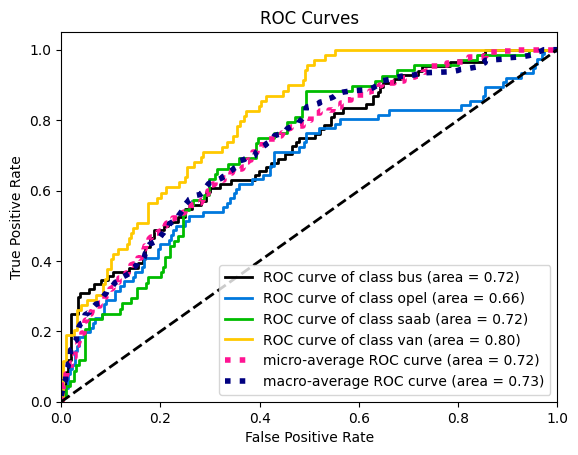

In [46]:
# plot roc
y_pred_proba = best_estim.predict_proba(test_pca)
scikitplot.metrics.plot_roc(y_test, y_pred_proba)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [47]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
dt = DecisionTreeClassifier(random_state=42)

# Установка параметров для кросс валидации для поиска optimal max_depth
param_grid = {'max_depth': range(1, 21)}

# Инициализация GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Поиск optimal max_depth
best_max_depth = grid_search.best_params_['max_depth']
print(f"Optimal max_depth: {best_max_depth}")

# Обучение дерева решений оптимальному значению max_depth
best_dt = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
best_dt.fit(X_train, y_train)

y_pred = best_dt.predict(X_test)

# Вывод параметров модели
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Optimal max_depth: 6
Accuracy: 0.6128
Precision: 0.6197
Recall: 0.6128
F1 Score: 0.6148


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble?

In [48]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

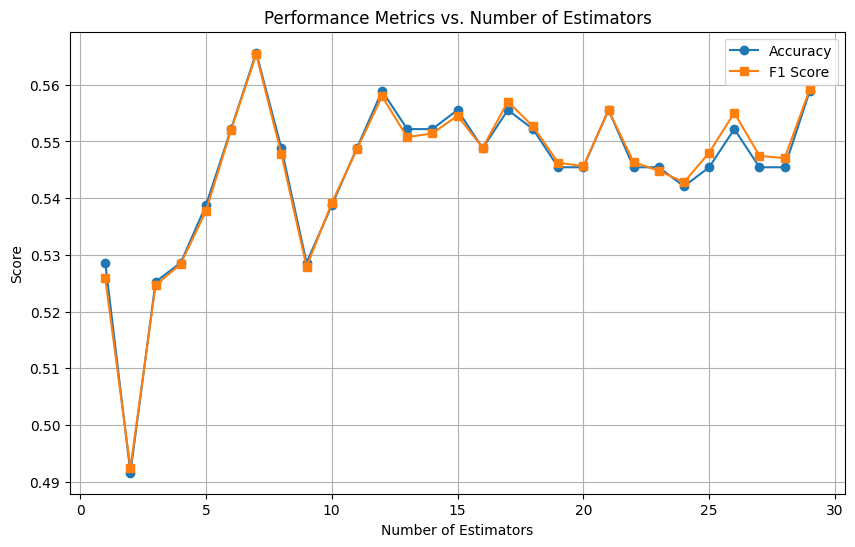

In [49]:
tree_model_optimized = DecisionTreeClassifier(max_depth=best_max_depth)
num_estimators = np.arange(1, 30)

# Объявление массивов для показателей производительности
accuracy_scores = np.zeros(len(num_estimators))
f1_scores = np.zeros(len(num_estimators))

for i, n_estimators in enumerate(num_estimators):
    clf = BaggingClassifier(estimator=tree_model_optimized, n_estimators=n_estimators, random_state=42)
    clf.fit(train_pca, y_train)

    y_pred = clf.predict(test_pca)

    accuracy_scores[i] = accuracy_score(y_test, y_pred)
    f1_scores[i] = f1_score(y_test, y_pred, average='weighted')

# Вывод результата
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, accuracy_scores, label='Accuracy', marker='o')
plt.plot(num_estimators, f1_scores, label='F1 Score', marker='s')
plt.title('Performance Metrics vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Оптимальное количество моделей - показатель, который стабилизирует показатели (F1 и accurancy) Добавление большего количества моделей сверх этого значения может привести к росту времени расчета модели.

Гиперпараметры дерева решений, оптимизированные для отдельных деревьев, могут быть неоптимальными для деревьев в ансамбле.
Например, деревья в наборах пакетов часто работают лучше, когда их меньше обрезают (например, путем увеличения max_depth)


#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

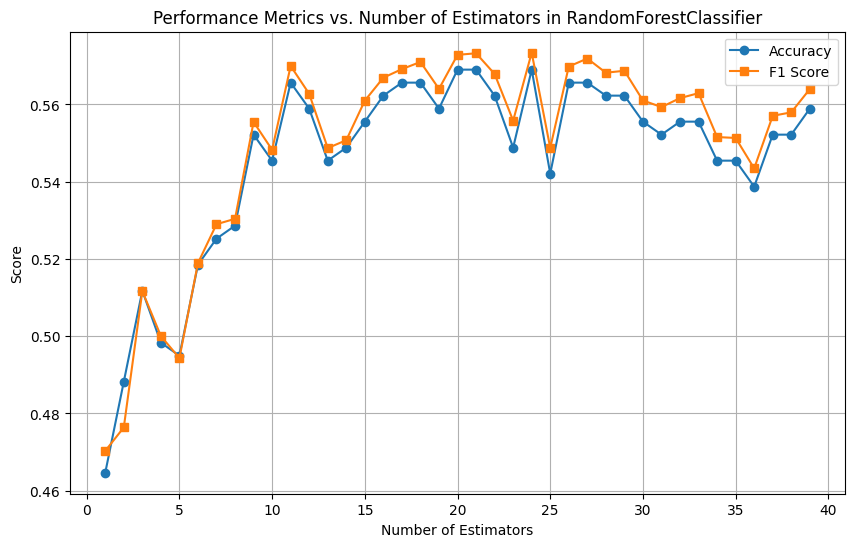

In [50]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
num_estimators_range = np.arange(1, 40)

accuracy_scores = np.zeros(len(num_estimators_range))
f1_scores = np.zeros(len(num_estimators_range))

for i, n_estimators in enumerate(num_estimators_range):
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    clf.fit(train_pca, y_train)
    y_pred = clf.predict(test_pca)


    accuracy_scores[i] = accuracy_score(y_test, y_pred)
    f1_scores[i] = f1_score(y_test, y_pred, average='weighted')

plt.figure(figsize=(10, 6))
plt.plot(num_estimators_range, accuracy_scores, label='Accuracy', marker='o')
plt.plot(num_estimators_range, f1_scores, label='F1 Score', marker='s')
plt.title('Performance Metrics vs. Number of Estimators in RandomForestClassifier')
plt.xlabel('Number of Estimators')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()

Оптимальное количество деревьев - число, при котором показатель F1 или accurancy стабилизируются (эффект плато). После достижения этоо числа, дальнейшее добавление деревьев существенно не улучшает производительность.
Это число может немного отличаться от оптимального размера для групповых наборов, поскольку случайный лес по своей сути улучшает разнообразие отдельных деревьев, используя случайный выбор признаков для разбиения.
Сравнение с групповыми наборами:

Для случайного леса часто требуется меньшее количество деревьев по сравнению с формирующими ансамблями логистических регрессий или деревьев решений. Это связано с тем, что случайный лес вносит дополнительное разнообразие за счет выборки признаков, делая ансамбль более устойчивым при меньшем количестве деревьев.
Для логистической регрессии и деревьев принятия решений разнообразие достигается только за счет начальной выборки данных, поэтому часто требуется более широкий набор данных.

Из графика мы видим, что с определенного момента, производительность не растет
показатели F1 и accuranсy достигают плато. Таким образом, дальнейшее увеличение деревьев, наша модель расчета не улучшается.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it?

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


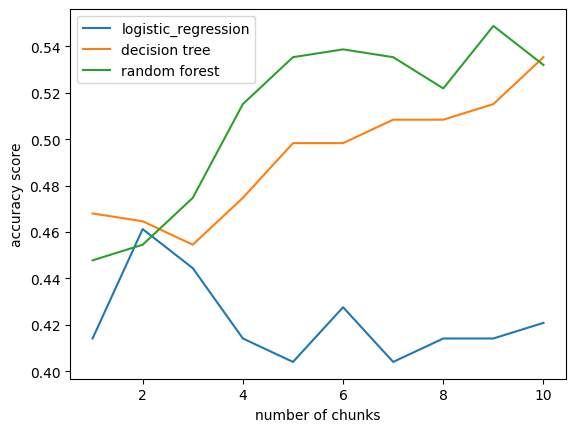

In [51]:
# YOUR CODE HERE
X_train = np.vstack((train_pca, train_pca[-1]))
y_train_stacked = np.hstack((y_train, y_train[-1]))
splitted_train_data = np.split(X_train, 10)
splitted_train_y = np.split(y_train_stacked, 10)

log_model = LogisticRegression(solver='saga', tol=1e-3)
decision_tree = DecisionTreeClassifier(max_depth=16)
random_forest = RandomForestClassifier(n_estimators=15)

dataset_size = np.linspace(1, 10, 10, dtype=int)
regr_accuracy_list = []
tree_accuracy_list = []
frst_accuracy_list = []
regr_f1_list = []
tree_f1_list = []
frst_f1_list = []

def compute_accuracy(model, X_test, y_test):
    return accuracy_score(y_test, model.predict(X_test))

def compute_f1(model, X_test, y_test):
    return f1_score(y_test, model.predict(X_test), average='weighted')

for size in dataset_size:
    # построение датасета
    dataset = np.concatenate(splitted_train_data[:size], axis=0)
    answers = np.concatenate(splitted_train_y[:size], axis=0)

    # обучение моделей
    log_model.fit(dataset, answers)
    decision_tree.fit(dataset, answers)
    random_forest.fit(dataset, answers)

    # вычисление метрик
    regr_accuracy_list.append(compute_accuracy(log_model, test_pca, y_test))
    tree_accuracy_list.append(compute_accuracy(decision_tree, test_pca, y_test))
    frst_accuracy_list.append(compute_accuracy(random_forest, test_pca, y_test))
    regr_f1_list.append(compute_f1(log_model, test_pca, y_test))
    tree_f1_list.append(compute_f1(decision_tree, test_pca, y_test))
    frst_f1_list.append(compute_f1(random_forest, test_pca, y_test))

plt.plot(dataset_size, regr_accuracy_list, label='logistic_regression')
plt.plot(dataset_size, tree_accuracy_list, label='decision tree')
plt.plot(dataset_size, frst_accuracy_list, label='random forest')
plt.xlabel('number of chunks')
plt.ylabel('accuracy score')
plt.legend()

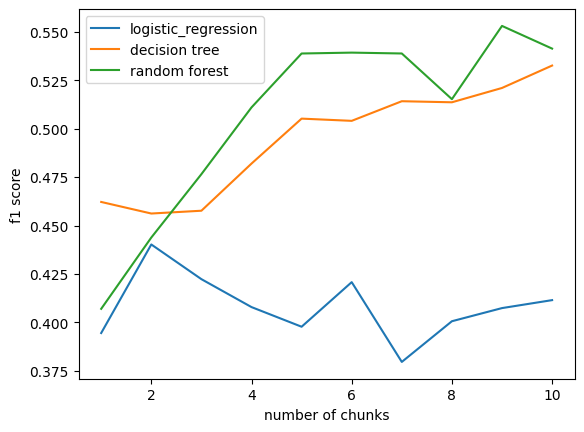

In [55]:
plt.plot(dataset_size, regr_f1_list, label='logistic_regression')
plt.plot(dataset_size, tree_f1_list, label='decision tree')
plt.plot(dataset_size, frst_f1_list, label='random forest')
plt.xlabel('number of chunks')
plt.ylabel('f1 score')
plt.legend()

Logistic Regression: демонстрирует более плавный рост производительности по мере увеличения размера набора данных, с более медленным выходом на плато из-за того, что она опирается на достаточное количество данных для обобщения.

Decision Tree: быстрее достигает более высокой производительности при использовании небольших наборов данных, но примерно одинаково выходит на плато, плюс произвдитеьность может снижаться из-за переобучения на небольших подмножествах данных

Random Forest: Работает более стабильнее, и улучшается производительность, по мере роста объема данных, так как становится более лучше с ростом разнообразия ансамблей и случайности моделей

#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

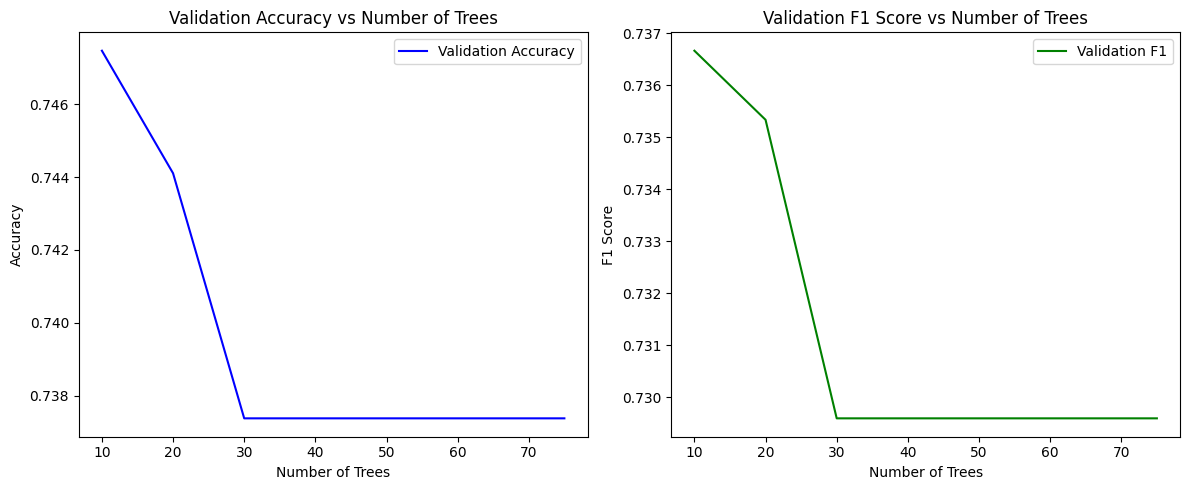

In [60]:
# YOUR CODE HERE
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

def prepare_data(X, categorical_features=None):
  if isinstance(X, pd.DataFrame):
      X = X.copy()
  else:
      X = pd.DataFrame(X)

  if categorical_features is None:
      categorical_features = list(X.select_dtypes(include=['object', 'category']).columns)

  encoders = {}

  for feature in categorical_features:
      le = LabelEncoder()
      if X[feature].isnull().any():
          values = X[feature].fillna('NaN_placeholder').values
          X[feature] = le.fit_transform(values)
          encoders[feature] = le
      else:
          X[feature] = le.fit_transform(X[feature].values)
          encoders[feature] = le

  return X.values, encoders

def optimize_xgboost(X_train, X_val, y_train, y_val, param_grid,  categorical_features=None):
  X_train_encoded, encoders = prepare_data(X_train, categorical_features)
  X_val_encoded, _ = prepare_data(X_val, categorical_features)

  # Encode target variable if it's categorical
  if isinstance(y_train[0], (str, bool)):
      le_target = LabelEncoder()
      y_train_encoded = le_target.fit_transform(y_train)
      y_val_encoded = le_target.transform(y_val)
  else:
      y_train_encoded = y_train
      y_val_encoded = y_val
      le_target = None

  # Convert to DMatrix format
  dtrain = xgb.DMatrix(X_train_encoded, label=y_train_encoded)
  dval = xgb.DMatrix(X_val_encoded, label=y_val_encoded)

  # Store results
  results = {
      'n_estimators': [],
      'val_accuracy': [],
      'val_f1': [],
      'best_iteration': None,
      'best_score': -np.inf
  }

  # Base parameters
  base_params = {
      'objective': 'multi:softmax',  # for multiclass classification
      'eval_metric': ['mlogloss', 'merror'],
      'num_class': len(np.unique(y_train_encoded)),
      'eta': 0.1,  # learning rate
      'max_depth': 6,
      'min_child_weight': 1,
      'subsample': 0.8,
      'colsample_bytree': 0.8,
      'tree_method': 'hist'  # for faster processing
  }

  # Try different numbers of trees
  for n_estimators in param_grid['n_estimators']:
      # Train model with early stopping
      evals_result = {}
      model = xgb.train(
          params=base_params,
          dtrain=dtrain,
          num_boost_round=n_estimators,
          evals=[(dtrain, 'train'), (dval, 'val')],
          early_stopping_rounds=20,
          evals_result=evals_result,
          verbose_eval=False
      )

      # Make predictions
      y_pred = model.predict(dval)

      # Convert predictions back to original labels if needed
      if le_target is not None:
          y_pred = le_target.inverse_transform(y_pred.astype(int))
          y_val_original = le_target.inverse_transform(y_val_encoded)
      else:
          y_val_original = y_val_encoded

      # Calculate metrics
      val_accuracy = accuracy_score(y_val_original, y_pred)
      val_f1 = f1_score(y_val_original, y_pred, average='weighted')

      # Store results
      results['n_estimators'].append(n_estimators)
      results['val_accuracy'].append(val_accuracy)
      results['val_f1'].append(val_f1)

      # Update best score
      if val_accuracy > results['best_score']:
          results['best_score'] = val_accuracy
          results['best_iteration'] = model.best_iteration
          best_model = model

  return best_model, results, encoders

param_grid = {
        'n_estimators': [10, 20, 30, 40, 50, 60, 70, 75]
    }

best_model, results, _ = optimize_xgboost(X_train, X_test, y_train, y_test, param_grid)

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(results['n_estimators'], results['val_accuracy'], 'b-', label='Validation Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy vs Number of Trees')
plt.legend()

# Plot F1 score
plt.subplot(1, 2, 2)
plt.plot(results['n_estimators'], results['val_f1'], 'g-', label='Validation F1')
plt.xlabel('Number of Trees')
plt.ylabel('F1 Score')
plt.title('Validation F1 Score vs Number of Trees')
plt.legend()

plt.tight_layout()
plt.show()




Оптимальное количество деревьев определяется динамически с помощью ранней остановки на основе результатов проверки.
Ранняя остановка предотвращает переобучение, останавливая обучение, когда за заданное количество раундов не наблюдается существенных улучшений.
Это сокращает время вычислений и устраняет необходимость в тщательном поиске по сетке с помощью n_estimators. Помогает найти количество деревьев, которое уравновешивает недостаточную и избыточную подгонку.
График как раз показвает, оптимальное количество деревьев